# Classify rivers

Classified based on:
- glaciers
- continental drainage
- near (old) mines

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import csv
import matplotlib
from matplotlib import colors

%matplotlib inline

Parameters:

In [15]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

Load ANHA4 runoff file:

In [250]:
c       = nc.Dataset('/data/brogalla/ANHA4/RUNOFF/FixedLandRunoff_FIX_ANHA4_Regul_HydroGFD_HBC_runoff_monthly_y2002.nc','r')
lon_rf  = np.array(c.variables['nav_lon'])
lat_rf  = np.array(c.variables['nav_lat'])
socoefr = np.array(c.variables['socoefr'])
rf      = np.array(c.variables['runoff'][8])

In [251]:
rf[rf == 0] = np.nan
lon_rf[rf == 0.0] = np.nan
lat_rf[rf == 0.0] = np.nan

### Classify regions:

Class numbers:
1. Glaciers
2. Continental
3. Mines

#### All other small rivers:

In [252]:
class_river = np.empty(rf.shape)
class_river[:] = np.nan
class_river[~np.isnan(rf)] = 3.0

#### Glacial rivers: 

In [253]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 82) & (lat_rf > 73) & (lon_rf < -62) & (lon_rf > -74))
index2 = np.argwhere((lat_rf < 85) & (lat_rf > 76) & (lon_rf < -73) & (lon_rf > -85))
index3 = np.argwhere((lat_rf < 74) & (lat_rf > 71) & (lon_rf < -70) & (lon_rf > -83))
index4 = np.argwhere((lat_rf < 77) & (lat_rf > 73) & (lon_rf < -79) & (lon_rf > -84))
index5 = np.argwhere((lat_rf < 80) & (lat_rf > 78) & (lon_rf < -90) & (lon_rf > -93))
index6 = np.argwhere((lat_rf < 84) & (lat_rf > 79) & (lon_rf < -93) & (lon_rf > -97))
index7 = np.argwhere((lat_rf < 86) & (lat_rf > 73) & (lon_rf < -40) & (lon_rf > -62))

In [254]:
def classify_glacier(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
#             rf[index[i][0],index[i][1]] = 1.0
            class_river[index[i][0],index[i][1]] = 1.0
    return class_river

In [255]:
class_river = classify_glacier(index1, rf, class_river) #Greenland
class_river = classify_glacier(index2, rf, class_river) #Ellesmere Island
class_river = classify_glacier(index3, rf, class_river) #Baffin Island
class_river = classify_glacier(index4, rf, class_river) #Southern Ellesmere Island
class_river = classify_glacier(index5, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index6, rf, class_river) #Western Ellesmere Island
class_river = classify_glacier(index7, rf, class_river) #More of Greenland

#### Continental drainage:

In [256]:
def classify_continental(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
            class_river[index[i][0],index[i][1]] = 2.0
    return class_river

In [257]:
# array of indices where latitude  & longitude condition (Greenland) is met
index1 = np.argwhere((lat_rf < 71) & (lat_rf > 67) & (lon_rf < -118) & (lon_rf > -150))
index2 = np.argwhere((lat_rf < 68.2) & (lat_rf > 67) & (lon_rf < -95) & (lon_rf > -115))
index3 = np.argwhere((lat_rf < 70) & (lat_rf > 67) & (lon_rf < -88) & (lon_rf > -100))
index4 = np.argwhere((lat_rf < 70) & (lat_rf > 65) & (lon_rf < -81) & (lon_rf > -87))
index5 = np.argwhere((lat_rf < 69) & (lat_rf > 65) & (lon_rf < -80) & (lon_rf > -95))
index6 = np.argwhere((lat_rf < 69) & (lat_rf > 67) & (lon_rf < -104) & (lon_rf > -109))
index7 = np.argwhere((lat_rf < 69) & (lat_rf > 65) & (lon_rf < -116) & (lon_rf > -119))
index8 = np.argwhere((lat_rf < 68.6) & (lat_rf > 65) & (lon_rf < -113) & (lon_rf > -116))
index9 = np.argwhere((lat_rf < 69.2) & (lat_rf > 65) & (lon_rf < -115) & (lon_rf > -120))

In [258]:
class_river = classify_continental(index1, rf, class_river) 
class_river = classify_continental(index2, rf, class_river)
class_river = classify_continental(index3, rf, class_river)
class_river = classify_continental(index4, rf, class_river)
class_river = classify_continental(index5, rf, class_river)
class_river = classify_continental(index6, rf, class_river)
class_river = classify_continental(index7, rf, class_river)
class_river = classify_continental(index8, rf, class_river)
class_river = classify_continental(index9, rf, class_river)

Consistency check:

In [259]:
print(rf[~np.isnan(rf)].shape, class_river[~np.isnan(class_river)].shape)

(85508,) (85508,)


#### Add a few "other" rivers back in:

In [260]:
def classify_other(index, rf, class_river):
    for i in range(0,index.shape[0]):         
        if ~np.isnan(rf[index[i][0],index[i][1]]):
            class_river[index[i][0],index[i][1]] = 3.0
    return class_river

In [261]:
# array of indices where latitude  & longitude condition is met
index1 = np.argwhere((lat_rf < 71) & (lat_rf > 68.8) & (lon_rf < -105) & (lon_rf > -109))
index2 = np.argwhere((lat_rf < 70.2) & (lat_rf > 69.8) & (lon_rf < -70) & (lon_rf > -89))

In [262]:
class_river = classify_other(index1, rf, class_river) 
class_river = classify_other(index2, rf, class_river)

# Plot full river classification:
1. Glaciers
2. Continental
3. Other

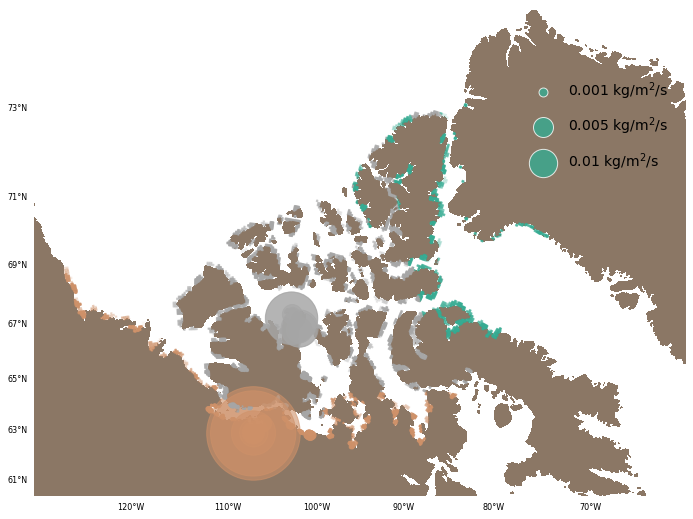

In [265]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-zoom.pickle','rb'))

x_rf,    y_rf    = proj1(lon_rf, lat_rf)

colormap = colors.ListedColormap(['#36ab92', '#ce9169', '#a6a6a6'])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=class_river[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*1e4, alpha=0.6, cmap=colormap, zorder=3)

for a in [0.001, 0.005, 0.010]:
    proj1.scatter([], [], c='#36ab92', alpha=0.8, s=a*8e4,
                label=str(a) + ' kg/m$^2$/s', edgecolors='w')
    
ax1.legend(loc=(0.75, 0.65), scatterpoints=1, frameon=False, labelspacing=1, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/river-classification.png', bbox_inches='tight', dpi=300)

# Write classification to file:

In [267]:
# Setup the new NetCDF file:
ncda = nc.Dataset('/ocean/brogalla/GEOTRACES/data/HYPE-river_class_202102.nc', 'w', zlib=True)

ncda.createDimension('x',len(c.dimensions['x']))
ncda.createDimension('y',len(c.dimensions['y']))

rclass = ncda.createVariable('rclass', 'int16', ('y','x'))
rclass.units = 'river class from 1-3'
rclass.long_name = 'river class'
rclass[:] = class_river

ncda.close()